# <center> Investigating the Relationship Between Tourism and GDP Fluctuations </center>

### <center>Introduction to Coding and Data Management 2</center>

##### <center>Carlo Alberto Sartori</center>

## Project Overview
In this project I'm going to investigate if there are any relationship or correlations between the tourism in a country and its GDP. I'm going to analize also GDP per capita and the growth rates both of tourism and GDP. In this analysis I'm going to use 3 datasets:
- one **GDP dataset** from the world bank (https://databank.worldbank.org/home)
<br>it contains the GDP, GDP per capita and the growth rate data for all the world's countries for the last 20 years
- one **tourism arrivals dataset** from the world tourism organization (https://www.unwto.org/)
<br>it contains the number of internationals tourist arrived in each country of the world for the last 15 years
- one **tourism departures dataset** from the world tourism organization (https://www.unwto.org/)
<br>it contains the number of inbound people departed from each country of the world for the last 15 years

During this project I'm going to clean, merge, analyze tese datasets. I'll also investigate some reseach questions, try to answer them and plot the result of my analysis.

### Reseach Questions
In this project I'm going to investigate the following research questions:
- How does the number of international tourist arrivals correlate with the GDP of countries over time? Can we find a relationship between these two?
- Is there a relationship between the growth rate of arriving tourists with the growth rate of a country's GDP?
- Are there significant differences in the number of arriving/departing tourists between high GDP and low GDP countries? Are the countries with the highest GDP the ones with the highest number of arrivals/departures and vice versa?


## Prepare The Sistem
### Installing Libraries
For this project we need to use some external libraries. First, if they are not present in the sistem, we install it via "pip install" then we will import them.

In [1]:
!pip install pandas
!pip install numpy
!pip install os
!pip install matplotlib.pyplot
!pip install openpyxl

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Data Loading And Cleaning
For this project I'm going to import 3 datasets, concerning the total GDP, GDP per capita, the annual GDP
growth, the annual GDP per capita growth the number of international tourist arrivals and resident visitors departures for all the world's countries over the last 15 years. The final aim is to group them in a unique dataframe but before doing this we need to load and clean these datasets.
### Loading Datasets

In [9]:

gdp_url = 'https://raw.githubusercontent.com/CarloH-AI/Coding1_Project/refs/heads/master/GDP_dataset.csv'
arrivals_url = 'https://raw.githubusercontent.com/CarloH-AI/Coding1_Project/refs/heads/master/tourism_arrivals.csv'
departures_url = 'https://raw.githubusercontent.com/CarloH-AI/Coding1_Project/refs/heads/master/tourism_departures.csv'

tot_gdp = pd.read_csv(gdp_url)
tot_arrivals = pd.read_csv(arrivals_url)
tot_departures = pd.read_csv(departures_url)

### Preview of the Imported Datasets
Now we will check if the data are succesfully imported.

In [10]:
tot_gdp #print a preview of the dataframe

,Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]
0,Afghanistan,AFG,2003.0,YR2003,4539500884.0479,8.83227781263571,200.462566743838,0.927029128491213
1,Afghanistan,AFG,2004.0,YR2004,5220823684.66085,1.41411798058979,221.657604182947,-2.49725463876793
2,Afghanistan,AFG,2005.0,YR2005,6226199249.32211,11.2297148236429,255.05511997846,7.32187384114641
3,Afghanistan,AFG,2006.0,YR2006,6971379033.26327,5.35740325126351,274.000486471348,1.08498820068206
4,Afghanistan,AFG,2007.0,YR2007,9715761649.79443,13.8263195479763,375.078128065393,11.8033826648298
...,...,...,...,...,...,...,...,...
4340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4343,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tot_arrivals

,Country Name,Country Code,Time,Time Code,"International tourism, number of arrivals [ST.INT.ARVL]"
0,Afghanistan,AFG,2008,YR2008,..
1,Afghanistan,AFG,2009,YR2009,..
2,Afghanistan,AFG,2010,YR2010,..
3,Afghanistan,AFG,2011,YR2011,..
4,Afghanistan,AFG,2012,YR2012,..
...,...,...,...,...,...
3250,Zimbabwe,ZWE,2018,YR2018,2580000
3251,Zimbabwe,ZWE,2019,YR2019,2294000
3252,Zimbabwe,ZWE,2020,YR2020,639000
3253,Zimbabwe,ZWE,2021,YR2021,..


In [12]:
tot_departures

,Country Name,Country Code,Time,Time Code,"International tourism, number of departures [ST.INT.DPRT]"
0,Afghanistan,AFG,2008,YR2008,..
1,Afghanistan,AFG,2009,YR2009,..
2,Afghanistan,AFG,2010,YR2010,..
3,Afghanistan,AFG,2011,YR2011,..
4,Afghanistan,AFG,2012,YR2012,..
...,...,...,...,...,...
3250,Zimbabwe,ZWE,2018,YR2018,2288000
3251,Zimbabwe,ZWE,2019,YR2019,3275000
3252,Zimbabwe,ZWE,2020,YR2020,..
3253,Zimbabwe,ZWE,2021,YR2021,..


As we can see there is some cleaning to do: lots of NaN and missing values, there are some columns we do not need and some columns name or type are incorrect.
### Cleaning the Datasets

To create a new unique dataframe we need before to clean the ones we have to make them with the most similar shapes possible so the merging process will be easier.

For the first step we merge **tot_arrivals** and **tot_departure** datasets to create create a new dataframe **tot_travel**. We do this because the 2 dataset are identical except for one column and by doing so the cleaning will be much easier.

In [ ]:
tot_travel = pd.merge(tot_arrivals, tot_departures, on=['Country Name', 'Country Code', 'Time', 'Time Code'])
tot_travel.head()

,Country Name,Country Code,Time,Time Code,"International tourism, number of arrivals [ST.INT.ARVL]","International tourism, number of departures [ST.INT.DPRT]"
0,Afghanistan,AFG,2008,YR2008,..,..
1,Afghanistan,AFG,2009,YR2009,..,..
2,Afghanistan,AFG,2010,YR2010,..,..
3,Afghanistan,AFG,2011,YR2011,..,..
4,Afghanistan,AFG,2012,YR2012,..,..


Now we start with the cleaning phase, starting with our first dataset **tot_gdp**:

In [ ]:
tot_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country Name                                          4342 non-null   object 
 1   Country Code                                          4340 non-null   object 
 2   Time                                                  4340 non-null   float64
 3   Time Code                                             4340 non-null   object 
 4   GDP (current US$) [NY.GDP.MKTP.CD]                    4340 non-null   object 
 5   GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]             4340 non-null   object 
 6   GDP per capita (current US$) [NY.GDP.PCAP.CD]         4340 non-null   object 
 7   GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]  4340 non-null   object 
dtypes: float64(1), object(7)
memory usage: 271.7+ KB


We want to convert the column **'Time'** from float to integer.

In [ ]:
tot_gdp['Time'] = tot_gdp['Time'].astype('Int64')
tot_gdp.head()

,Country Name,Country Code,Time,Time Code,GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]
0,Afghanistan,AFG,2003,YR2003,4539500884.0479,8.83227781263571,200.462566743838,0.927029128491213
1,Afghanistan,AFG,2004,YR2004,5220823684.66085,1.41411798058979,221.657604182947,-2.49725463876793
2,Afghanistan,AFG,2005,YR2005,6226199249.32211,11.2297148236429,255.05511997846,7.32187384114641
3,Afghanistan,AFG,2006,YR2006,6971379033.26327,5.35740325126351,274.000486471348,1.08498820068206
4,Afghanistan,AFG,2007,YR2007,9715761649.79443,13.8263195479763,375.078128065393,11.8033826648298


We will remove the columns **Country Code** and **Time Code** because they are useless.

In [ ]:
tot_gdp = tot_gdp.drop(['Country Code', 'Time Code'], axis=1)
tot_gdp.head()

,Country Name,Time,GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (current US$) [NY.GDP.PCAP.CD],GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]
0,Afghanistan,2003,4539500884.0479,8.83227781263571,200.462566743838,0.927029128491213
1,Afghanistan,2004,5220823684.66085,1.41411798058979,221.657604182947,-2.49725463876793
2,Afghanistan,2005,6226199249.32211,11.2297148236429,255.05511997846,7.32187384114641
3,Afghanistan,2006,6971379033.26327,5.35740325126351,274.000486471348,1.08498820068206
4,Afghanistan,2007,9715761649.79443,13.8263195479763,375.078128065393,11.8033826648298


Now we change the columns names.

In [ ]:
tot_gdp.columns = ['Country Name', 'Year', 'GDP (current US$)','GDP annual growth %','GDP per capita (current US$)','GDP per capita annual growth %']
tot_gdp.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %
0,Afghanistan,2003,4539500884.0479,8.83227781263571,200.462566743838,0.927029128491213
1,Afghanistan,2004,5220823684.66085,1.41411798058979,221.657604182947,-2.49725463876793
2,Afghanistan,2005,6226199249.32211,11.2297148236429,255.05511997846,7.32187384114641
3,Afghanistan,2006,6971379033.26327,5.35740325126351,274.000486471348,1.08498820068206
4,Afghanistan,2007,9715761649.79443,13.8263195479763,375.078128065393,11.8033826648298


Let's find the rows with NaN values.

In [ ]:
nan_df = tot_gdp[tot_gdp.isna().any(axis=1)]
display(nan_df.head())

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %
4340,NaN,<NA>,NaN,NaN,NaN,NaN
4341,NaN,<NA>,NaN,NaN,NaN,NaN
4342,NaN,<NA>,NaN,NaN,NaN,NaN
4343,Data from database: World Development Indicators,<NA>,NaN,NaN,NaN,NaN
4344,Last Updated: 05/10/2023,<NA>,NaN,NaN,NaN,NaN


Now we get rid of the rows with NaN values.

In [ ]:
tot_gdp = tot_gdp.dropna()
tot_gdp

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %
0,Afghanistan,2003,4539500884.0479,8.83227781263571,200.462566743838,0.927029128491213
1,Afghanistan,2004,5220823684.66085,1.41411798058979,221.657604182947,-2.49725463876793
2,Afghanistan,2005,6226199249.32211,11.2297148236429,255.05511997846,7.32187384114641
3,Afghanistan,2006,6971379033.26327,5.35740325126351,274.000486471348,1.08498820068206
4,Afghanistan,2007,9715761649.79443,13.8263195479763,375.078128065393,11.8033826648298
...,...,...,...,...,...,...
4335,Zimbabwe,2018,34156069918.0609,5.00986678330221,2269.17701232332,2.90939513608366
4336,Zimbabwe,2019,21832234925.5021,-6.33244640703352,1421.86859641758,-8.17732035157181
4337,Zimbabwe,2020,21509698406.1116,-7.81695064681365,1372.69667433317,-9.67040477679424
4338,Zimbabwe,2021,28371238665.5116,8.46801689759531,1773.92041088078,6.27161321467831


Now we continue with the cleaning process with dataframe **tot_travel** that we create above:

In [ ]:
tot_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 6 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Country Name                                               3255 non-null   object
 1   Country Code                                               3255 non-null   object
 2   Time                                                       3255 non-null   int64 
 3   Time Code                                                  3255 non-null   object
 4   International tourism, number of arrivals [ST.INT.ARVL]    3255 non-null   object
 5   International tourism, number of departures [ST.INT.DPRT]  3255 non-null   object
dtypes: int64(1), object(5)
memory usage: 152.7+ KB


Let's find the rows with NaN values and eliminate them.

In [ ]:
tot_travel = tot_travel.dropna()
tot_travel.head()

,Country Name,Country Code,Time,Time Code,"International tourism, number of arrivals [ST.INT.ARVL]","International tourism, number of departures [ST.INT.DPRT]"
0,Afghanistan,AFG,2008,YR2008,..,..
1,Afghanistan,AFG,2009,YR2009,..,..
2,Afghanistan,AFG,2010,YR2010,..,..
3,Afghanistan,AFG,2011,YR2011,..,..
4,Afghanistan,AFG,2012,YR2012,..,..


We are going to remove the columns **Country Code** and **Time Code** because they are useless.

In [ ]:
tot_travel = tot_travel.drop(['Country Code', 'Time Code'], axis=1)
tot_travel.head()

,Country Name,Time,"International tourism, number of arrivals [ST.INT.ARVL]","International tourism, number of departures [ST.INT.DPRT]"
0,Afghanistan,2008,..,..
1,Afghanistan,2009,..,..
2,Afghanistan,2010,..,..
3,Afghanistan,2011,..,..
4,Afghanistan,2012,..,..


Now also for this dataframe we change the columns names.

In [ ]:
tot_travel.columns = ['Country Name', 'Year', 'Number of Arrivals','Number of Departures']
tot_travel.head()

,Country Name,Year,Number of Arrivals,Number of Departures
0,Afghanistan,2008,..,..
1,Afghanistan,2009,..,..
2,Afghanistan,2010,..,..
3,Afghanistan,2011,..,..
4,Afghanistan,2012,..,..


Now our two dataframe have more similar shapes so merging them will be easier.

## Data Combining And Reshaping

We still have many missing values ​​but before managing them let's merge our two dataframes into a single one called **all_data** so it will be easier to identify, interpret and manage these missing data. After doing this we will finish cleaning and reshaping this dataframe to obtain a final cleaned and ordered dataframe on which we can do our analysis.

In [ ]:
all_data = pd.merge( tot_gdp, tot_travel,on=['Country Name', 'Year'])
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,10249767311.213,3.92498382161573,387.849174300047,1.86475446570947,..,..
1,Afghanistan,2009,12154835707.8987,21.3905283931066,443.845150536332,17.1435343251686,..,..
2,Afghanistan,2010,15633856787.0425,14.3624414692681,554.595200222354,11.0992199166219,..,..
3,Afghanistan,2011,18190410820.6235,0.426354784529209,621.912310861592,-3.21136429567835,..,..
4,Afghanistan,2012,20203572959.5023,12.7522870887171,663.141052810937,8.24714425211255,..,..


Created the new dataframe we can see that the missing data are rapresented by ".." , for a easier cleaning process now we are going to substitute all this values with NaN values.

In [ ]:
all_data = all_data.replace('..', np.nan)
nan_values = all_data.isnull()
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,10249767311.213,3.92498382161573,387.849174300047,1.86475446570947,NaN,NaN
1,Afghanistan,2009,12154835707.8987,21.3905283931066,443.845150536332,17.1435343251686,NaN,NaN
2,Afghanistan,2010,15633856787.0425,14.3624414692681,554.595200222354,11.0992199166219,NaN,NaN
3,Afghanistan,2011,18190410820.6235,0.426354784529209,621.912310861592,-3.21136429567835,NaN,NaN
4,Afghanistan,2012,20203572959.5023,12.7522870887171,663.141052810937,8.24714425211255,NaN,NaN


Let's see in which columns we have NaN values.

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3255 non-null   object 
 1   Year                            3255 non-null   Int64  
 2   GDP (current US$)               2915 non-null   object 
 3   GDP annual growth %             2868 non-null   object 
 4   GDP per capita (current US$)    2915 non-null   object 
 5   GDP per capita annual growth %  2868 non-null   object 
 6   Number of Arrivals              2403 non-null   float64
 7   Number of Departures            1275 non-null   float64
dtypes: Int64(1), float64(2), object(5)
memory usage: 206.7+ KB


The first thing that we have to do is to change the type of some columns form object to a numerical type, this will be usefull for our later analysis.

In [ ]:
columns_to_convert= ['GDP (current US$)','GDP annual growth %','GDP per capita (current US$)','GDP per capita annual growth %']

all_data[columns_to_convert] = all_data[columns_to_convert].apply(pd.to_numeric)
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,1.024977e+10,3.924984,387.849174,1.864754,NaN,NaN
1,Afghanistan,2009,1.215484e+10,21.390528,443.845151,17.143534,NaN,NaN
2,Afghanistan,2010,1.563386e+10,14.362441,554.595200,11.099220,NaN,NaN
3,Afghanistan,2011,1.819041e+10,0.426355,621.912311,-3.211364,NaN,NaN
4,Afghanistan,2012,2.020357e+10,12.752287,663.141053,8.247144,NaN,NaN


The first two colums do not have NaN values so we have to clean the remaining six, starting with the GDP one:

Let's find wich year has NaN values for GDP and remove that.

In [ ]:
nan_gdp = all_data.loc[all_data['GDP (current US$)'].isnull(), 'Year'] #find NaN values

all_data = all_data.dropna(subset=['GDP (current US$)']) #remove rows with NaN values
all_data

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,1.024977e+10,3.924984,387.849174,1.864754,NaN,NaN
1,Afghanistan,2009,1.215484e+10,21.390528,443.845151,17.143534,NaN,NaN
2,Afghanistan,2010,1.563386e+10,14.362441,554.595200,11.099220,NaN,NaN
3,Afghanistan,2011,1.819041e+10,0.426355,621.912311,-3.211364,NaN,NaN
4,Afghanistan,2012,2.020357e+10,12.752287,663.141053,8.247144,NaN,NaN
...,...,...,...,...,...,...,...,...
3249,Zimbabwe,2017,1.758489e+10,4.080264,1192.107012,1.974846,2423000.0,2768000.0
3250,Zimbabwe,2018,3.415607e+10,5.009867,2269.177012,2.909395,2580000.0,2288000.0
3251,Zimbabwe,2019,2.183223e+10,-6.332446,1421.868596,-8.177320,2294000.0,3275000.0
3252,Zimbabwe,2020,2.150970e+10,-7.816951,1372.696674,-9.670405,639000.0,NaN


From our dataframe we can see that some countries have NaN values in the column **Number of Arrivals** for the year 2021 so to make the analisys equal for all countries we will remove all the rows corresponding to the year 2021.

We are going to remove also all the rows corresponding to the year 2020 because, due to the COVID-19 pandemic, tourism has dropped a lot and the datas are significantly lower than the previous year. We want to remove this row because the drop in arrivals/departures of this year is not strictly related to GDP fluctuations but to the pandemic and therefore we want to exclude this external factor from our analysis.

In [ ]:
years_to_remove = [2020, 2021]
all_data = all_data.loc[~all_data['Year'].isin(years_to_remove)]

all_data = all_data.reset_index(drop=True) # reset row index
all_data

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,1.024977e+10,3.924984,387.849174,1.864754,NaN,NaN
1,Afghanistan,2009,1.215484e+10,21.390528,443.845151,17.143534,NaN,NaN
2,Afghanistan,2010,1.563386e+10,14.362441,554.595200,11.099220,NaN,NaN
3,Afghanistan,2011,1.819041e+10,0.426355,621.912311,-3.211364,NaN,NaN
4,Afghanistan,2012,2.020357e+10,12.752287,663.141053,8.247144,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,Zimbabwe,2015,1.996312e+10,2.023650,1410.329174,-0.132760,2057000.0,3393000.0
2510,Zimbabwe,2016,2.054868e+10,0.900955,1421.787789,-1.177893,2168000.0,3192000.0
2511,Zimbabwe,2017,1.758489e+10,4.080264,1192.107012,1.974846,2423000.0,2768000.0
2512,Zimbabwe,2018,3.415607e+10,5.009867,2269.177012,2.909395,2580000.0,2288000.0


There are states that still have NaN values ​​in the **Number of Arrivals** column, this may be due to the fact that they are poor or underdeveloped states, or because there are ongoing wars or restrictions on tourists.

Here we can see as an example Afghanistan, South Sudan and Somalia :

In [ ]:
state = 'Afghanistan'

state_rows = all_data.loc[all_data['Country Name'] == state]
state_rows

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Afghanistan,2008,1.024977e+10,3.924984,387.849174,1.864754,NaN,NaN
1,Afghanistan,2009,1.215484e+10,21.390528,443.845151,17.143534,NaN,NaN
2,Afghanistan,2010,1.563386e+10,14.362441,554.595200,11.099220,NaN,NaN
3,Afghanistan,2011,1.819041e+10,0.426355,621.912311,-3.211364,NaN,NaN
4,Afghanistan,2012,2.020357e+10,12.752287,663.141053,8.247144,NaN,NaN
5,Afghanistan,2013,2.056449e+10,5.600745,651.987862,2.002522,NaN,NaN
6,Afghanistan,2014,2.055058e+10,2.724543,628.146804,-0.964803,NaN,NaN
7,Afghanistan,2015,1.999816e+10,1.451315,592.476537,-1.666416,NaN,NaN
8,Afghanistan,2016,1.801956e+10,2.260314,520.252064,-0.345802,NaN,NaN
9,Afghanistan,2017,1.889635e+10,2.647003,530.149831,-0.253594,NaN,NaN


In [ ]:
state = 'South Sudan'

state_rows = all_data.loc[all_data['Country Name'] == state]
state_rows

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
2066,South Sudan,2008,1.458625e+10,NaN,1653.041537,NaN,NaN,NaN
2067,South Sudan,2009,1.223126e+10,5.041642,1325.275077,0.428311,NaN,NaN
2068,South Sudan,2010,1.460207e+10,5.493416,1503.133889,0.224490,NaN,NaN
2069,South Sudan,2011,1.490731e+10,-4.640317,1455.358407,-9.561711,NaN,NaN
2070,South Sudan,2012,1.193147e+10,-46.082122,1114.923723,-48.392454,NaN,NaN
2071,South Sudan,2013,1.842647e+10,13.129731,1659.140787,9.010103,NaN,NaN
2072,South Sudan,2014,1.396221e+10,3.373648,1245.149311,2.384899,NaN,NaN
2073,South Sudan,2015,1.199780e+10,-10.793365,1071.777765,-10.642074,NaN,NaN


In [ ]:
state = 'Somalia'

state_rows = all_data.loc[all_data['Country Name'] == state]
state_rows

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
2047,Somalia,2013,4.577000e+09,NaN,356.117902,NaN,NaN,NaN
2048,Somalia,2014,5.025000e+09,7.794200,377.557387,4.094889,NaN,NaN
2049,Somalia,2015,5.335000e+09,15.049941,387.607994,11.249431,NaN,NaN
2050,Somalia,2016,5.534000e+09,8.532293,387.186682,4.515796,NaN,NaN
2051,Somalia,2017,5.609000e+09,2.349583,377.349072,-1.584689,NaN,NaN
2052,Somalia,2018,5.856000e+09,7.530969,379.986003,3.715161,NaN,NaN
2053,Somalia,2019,6.485000e+09,7.456522,405.786763,3.622518,NaN,NaN


As we can see all these countries and also others, do not have arrival and/or departures for the reasons we said above (wars, poverty, restrictions, ecc.). There are also countries like North Korea for which we have no data on tourism and gdp because they are regimes that do not leak information.

As we did for the GDP, since it is a fundamental data for our research, we will remove all the rows that have NaN values ​​in the **Number of Arrivals** column.

In [ ]:
all_data = all_data.dropna(subset=['Number of Arrivals'])
all_data = all_data.reset_index(drop=True)
all_data

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Departures
0,Albania,2008,1.288135e+10,7.500041,4370.539925,8.328108,1420000.0,3716000.0
1,Albania,2009,1.204421e+10,3.354289,4114.134899,4.053140,1856000.0,3404000.0
2,Albania,2010,1.192692e+10,3.706938,4094.348386,4.223084,2417000.0,3443000.0
3,Albania,2011,1.289076e+10,2.545406,4437.142612,2.821642,2932000.0,4120000.0
4,Albania,2012,1.231983e+10,1.417243,4247.630047,1.584873,3514000.0,3959000.0
...,...,...,...,...,...,...,...,...
2239,Zimbabwe,2015,1.996312e+10,2.023650,1410.329174,-0.132760,2057000.0,3393000.0
2240,Zimbabwe,2016,2.054868e+10,0.900955,1421.787789,-1.177893,2168000.0,3192000.0
2241,Zimbabwe,2017,1.758489e+10,4.080264,1192.107012,1.974846,2423000.0,2768000.0
2242,Zimbabwe,2018,3.415607e+10,5.009867,2269.177012,2.909395,2580000.0,2288000.0


In our analysis we want also to compare the GDP percentage growth with the arrivals percentage growth, but we do not have this last data in our dataframe so we need to compute it.

We start by creating a new column that will be usefull for our analysis called **Number of Arrivals annual growth %**.

In [ ]:
all_data.insert( 7 , 'Number of Arrivals annual growth %' , None)
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
0,Albania,2008,1.288135e+10,7.500041,4370.539925,8.328108,1420000.0,None,3716000.0
1,Albania,2009,1.204421e+10,3.354289,4114.134899,4.053140,1856000.0,None,3404000.0
2,Albania,2010,1.192692e+10,3.706938,4094.348386,4.223084,2417000.0,None,3443000.0
3,Albania,2011,1.289076e+10,2.545406,4437.142612,2.821642,2932000.0,None,4120000.0
4,Albania,2012,1.231983e+10,1.417243,4247.630047,1.584873,3514000.0,None,3959000.0


Now the column is empty, we will put as values in this column the percentage change in number of arrivals between years.

In [ ]:
all_data['Number of Arrivals annual growth %'] = all_data['Number of Arrivals'].pct_change() * 100
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
0,Albania,2008,1.288135e+10,7.500041,4370.539925,8.328108,1420000.0,NaN,3716000.0
1,Albania,2009,1.204421e+10,3.354289,4114.134899,4.053140,1856000.0,30.704225,3404000.0
2,Albania,2010,1.192692e+10,3.706938,4094.348386,4.223084,2417000.0,30.226293,3443000.0
3,Albania,2011,1.289076e+10,2.545406,4437.142612,2.821642,2932000.0,21.307406,4120000.0
4,Albania,2012,1.231983e+10,1.417243,4247.630047,1.584873,3514000.0,19.849932,3959000.0


As we could expect for each country the first year of the **Number of Arrivals annual growth %** column has a NaN value (in oour case the year 2008), this is because there is no previous year (in our case 2007) in our dataframe on which we can make the comparison to calculate the percentage growth. Now we need to remove these NaN values.


In [ ]:
years_to_remove = [2008]
all_data = all_data.loc[~all_data['Year'].isin(years_to_remove)]

all_data = all_data.reset_index(drop=True) # reset row index
all_data.head()

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
0,Albania,2009,1.204421e+10,3.354289,4114.134899,4.053140,1856000.0,30.704225,3404000.0
1,Albania,2010,1.192692e+10,3.706938,4094.348386,4.223084,2417000.0,30.226293,3443000.0
2,Albania,2011,1.289076e+10,2.545406,4437.142612,2.821642,2932000.0,21.307406,4120000.0
3,Albania,2012,1.231983e+10,1.417243,4247.630047,1.584873,3514000.0,19.849932,3959000.0
4,Albania,2013,1.277622e+10,1.002018,4413.062005,1.187234,3256000.0,-7.342060,3928000.0


We have now finished all the data cleaning we needed for creating the new dataframe, that will contain: **GDP (current US$)**, **GDP annual growth %**, **GDP per capita (current US$)**, **GDP per capita annual growth %**, **Number of Arrivals**,**Number of Arrivals annual growth %**, **Number of Departures** ordered by **Country Name** and **Year**.

*OPTIONAL* below here you can find a code to download the new **all_data** dataset if you want.

In [ ]:
#current_directory = os.getcwd()

#file_name = 'all_data.csv'

#directory = os.path.join(current_directory, file_name)

#all_data.to_csv(directory, index=False)

## Data Analysis

In this section of the project I'll analyze data according to a parameter (country name and year). Based on this analysis I'm going interpret the data. The porpouse of this section is to understand how data are correlated with each other and to interpret these informations to try to answear to the research questions.

So now the aim is to understand if there is a correlation between GDP and arrivals/departures in a country over the years. I'll analyze separately  the arrivals and the departures correlation with GDP because their meaning is different. Because arrivals is a data of tourist instead departures is a data concerning the population of the state and not the tourist.

### Relationship Between Numbers of Arrivals and GDP
To start with our analysis let's find the countries with the highest GDP and the countries with the most tourist arrivals to see if there is any correlation. To simplify the process I choose to analize the data of each country for one year (in this case 2019). Later we will analize the evolutions of the data over the time.

In [ ]:
#countries with highest GDP
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP (current US$)', ascending=False)
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1956,United States,2019,2.138098e+13,2.294439,65120.394663,1.829668,165478000.0,-2.271917,1.709301e+08
410,China,2019,1.427994e+13,5.950501,10143.838196,5.575317,162538000.0,2.479099,1.546320e+08
933,Japan,2019,5.123318e+12,-0.240351,40458.001876,-0.100125,31881000.0,2.212177,2.008100e+07
708,Germany,2019,3.888226e+12,1.056604,46793.686762,0.828958,39563000.0,1.754070,9.953300e+07
1945,United Kingdom,2019,2.857058e+12,1.604309,42747.080460,1.032741,40857000.0,1.424919,9.308600e+07
851,India,2019,2.831552e+12,3.737919,2047.232704,2.679717,17914000.0,2.818114,2.691500e+07
664,France,2019,2.728870e+12,1.842972,40494.898294,1.495899,217877000.0,2.773139,4.927600e+07
911,Italy,2019,2.011302e+12,0.483198,33673.750963,1.648503,95399000.0,2.328039,6.220700e+07
276,Brazil,2019,1.873274e+12,1.220778,8845.259118,0.448280,6353000.0,-4.047727,NaN
355,Canada,2019,1.742015e+12,1.879592,46328.671841,0.426918,32430000.0,3.696361,3.784590e+07


In [ ]:
#countries with highest number of arrivals
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals', ascending=False)
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
664,France,2019,2.728870e+12,1.842972,40494.898294,1.495899,217877000.0,2.773139,4.927600e+07
1956,United States,2019,2.138098e+13,2.294439,65120.394663,1.829668,165478000.0,-2.271917,1.709301e+08
410,China,2019,1.427994e+13,5.950501,10143.838196,5.575317,162538000.0,2.479099,1.546320e+08
1695,Spain,2019,1.394320e+12,1.983966,29581.518551,1.254632,126170000.0,1.377194,2.281600e+07
1184,Mexico,2019,1.269012e+12,-0.199048,10145.170183,-1.053918,97406000.0,0.941998,8.275200e+07
911,Italy,2019,2.011302e+12,0.483198,33673.750963,1.648503,95399000.0,2.328039,6.220700e+07
1481,Poland,2019,5.960546e+11,4.449988,15699.911350,4.475505,88515000.0,2.989086,5.060000e+07
829,Hungary,2019,1.639886e+11,4.857792,16782.952464,4.905257,61397000.0,6.468171,2.486000e+07
482,Croatia,2019,6.232798e+10,3.421006,15331.883054,3.995701,60021000.0,4.080252,3.500000e+06
818,"Hong Kong SAR, China",2019,3.630525e+11,-1.678246,48356.063504,-2.402443,55913000.0,-14.175416,9.471500e+07


From what we can see here we can draw our first conclusions. To see if there is any correlation between GDP and tourism the tables above should be equal or, at least, similar. We can see that them are not perfectly identical but there are some states that are present (even if in different positions) in both tables for example: **United States**, **China**, **Germany**, **France**, **Italy**. This cannnot rapresent a strong correlation but may be a sign that there is some dependency between the two data.

To better understand this let's find the countries with the lowest GDP and the countries with the least tourist arrivals to see if there is any correlation. To simplify the process I choose to analize also in this case the data of each country for one year (in this case 2019).

In [ ]:
#countries with lowest GDP
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP (current US$)')
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1907,Tuvalu,2019,5.422315e+07,13.793103,4949.173888,12.847943,3599.999905,12.499995,NaN
972,Kiribati,2019,1.779353e+08,-0.539607,1432.178985,-2.124685,12000.000000,33.333333,NaN
1162,Marshall Islands,2019,2.320923e+08,10.839214,5188.971114,13.964063,6099.999905,-10.294122,NaN
1415,Palau,2019,2.789000e+08,0.395968,15567.090868,0.104576,94000.000000,-11.320755,NaN
1194,"Micronesia, Fed. Sts.",2019,4.120000e+08,1.174799,3699.081514,0.766027,18000.000000,-6.250004,NaN
1852,Tonga,2019,5.120577e+08,0.706483,4879.017342,0.897435,94000.000000,21.604135,NaN
551,Dominica,2019,6.115370e+08,5.502483,8561.587011,4.608870,322000.000000,61.809045,NaN
32,American Samoa,2019,6.470000e+08,-0.487805,13672.576657,1.831714,19200.000763,-4.950495,NaN
1739,St. Vincent and the Grenadines,2019,9.101497e+08,0.404010,8674.371009,0.745631,392000.000000,10.112360,NaN
1558,Samoa,2019,9.129445e+08,4.451859,4308.272753,3.365467,181000.000000,5.232558,69000.0


In [ ]:
#countries with lowest number of arrivals
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals')
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1907,Tuvalu,2019,5.422315e+07,13.793103,4949.173888,12.847943,3599.999905,12.499995,NaN
1162,Marshall Islands,2019,2.320923e+08,10.839214,5188.971114,13.964063,6099.999905,-10.294122,NaN
972,Kiribati,2019,1.779353e+08,-0.539607,1432.178985,-2.124685,12000.000000,33.333333,NaN
1194,"Micronesia, Fed. Sts.",2019,4.120000e+08,1.174799,3699.081514,0.766027,18000.000000,-6.250004,NaN
32,American Samoa,2019,6.470000e+08,-0.487805,13672.576657,1.831714,19200.000763,-4.950495,NaN
1673,Solomon Islands,2019,1.619155e+09,1.749514,2398.772757,-0.623761,28899.999619,3.584229,NaN
432,Comoros,2019,1.195020e+09,1.760780,1510.797358,-0.126909,45099.998474,25.626731,NaN
774,Guinea-Bissau,2019,1.439638e+09,4.500000,730.611449,2.086875,52400.001526,-4.727270,NaN
1626,Sierra Leone,2019,4.076579e+09,5.254241,506.606894,2.827247,71000.000000,7.575758,122000.0
1830,Timor-Leste,2019,2.028552e+09,23.513791,1584.263844,21.720270,74800.003052,0.268103,NaN


Also in this case the two tables are not completely identical but there are also here states that are present in both, for example: **Tuvalu**,**Kiribati**, **Marshall Islands**, **Micronesia, Fed. Sts.**,**American Samoa**. So also here we can see some dependency between the two data.

We cannot conclude with certainty that there is a close relationship between number of arrivals and GDP but certainly there are some correlations.

To understand other correlations now we are going to compare numbers of arrivals with GDP per capita.
### Relationship Between Number of Arrivals and GDP per capita
Let's find the countries with the highest GDP per capita and the countries with the most tourist arrivals to see if there is any correlation. Also in this case we analize only 2019.

In [ ]:
#countries with highest GDP per capita
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP per capita (current US$)', ascending=False)
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1216,Monaco,2019,7.383746e+09,6.905665,199377.481832,6.891232,3.630000e+05,4.610951,NaN
1060,Liechtenstein,2019,6.427249e+09,NaN,167019.618093,NaN,9.810000e+04,15.005856,NaN
228,Bermuda,2019,7.423465e+09,0.306267,116153.166122,0.317253,8.050000e+05,5.091384,NaN
1082,Luxembourg,2019,6.982564e+10,2.319925,112621.821337,0.331126,1.041000e+06,2.259332,2548000.0
366,Cayman Islands,2019,5.943589e+09,3.873076,89871.913139,1.909769,2.334000e+06,-2.097315,NaN
1780,Switzerland,2019,7.213691e+11,1.141982,84121.931030,0.423090,1.181800e+07,0.879215,19797000.0
1093,"Macao SAR, China",2019,5.520476e+10,-2.511938,83183.166609,-4.371937,3.940600e+07,10.060328,1765000.0
889,Ireland,2019,3.993217e+11,5.440937,80927.074671,4.008715,1.095100e+07,0.228812,9350000.0
1389,Norway,2019,4.049414e+11,0.745798,75719.752897,0.067993,5.879000e+06,3.357947,8890000.0
840,Iceland,2019,2.482610e+10,2.415456,68853.715217,0.187990,2.202000e+06,-11.495177,611000.0


In [ ]:
#countries with highest number of arrivals
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals', ascending=False)
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
664,France,2019,2.728870e+12,1.842972,40494.898294,1.495899,217877000.0,2.773139,4.927600e+07
1956,United States,2019,2.138098e+13,2.294439,65120.394663,1.829668,165478000.0,-2.271917,1.709301e+08
410,China,2019,1.427994e+13,5.950501,10143.838196,5.575317,162538000.0,2.479099,1.546320e+08
1695,Spain,2019,1.394320e+12,1.983966,29581.518551,1.254632,126170000.0,1.377194,2.281600e+07
1184,Mexico,2019,1.269012e+12,-0.199048,10145.170183,-1.053918,97406000.0,0.941998,8.275200e+07
911,Italy,2019,2.011302e+12,0.483198,33673.750963,1.648503,95399000.0,2.328039,6.220700e+07
1481,Poland,2019,5.960546e+11,4.449988,15699.911350,4.475505,88515000.0,2.989086,5.060000e+07
829,Hungary,2019,1.639886e+11,4.857792,16782.952464,4.905257,61397000.0,6.468171,2.486000e+07
482,Croatia,2019,6.232798e+10,3.421006,15331.883054,3.995701,60021000.0,4.080252,3.500000e+06
818,"Hong Kong SAR, China",2019,3.630525e+11,-1.678246,48356.063504,-2.402443,55913000.0,-14.175416,9.471500e+07


As we can see there are no common elements between the two tablesso we can say that there are no correlations. To better understand this let's find the countries with the lowest GDP per capita and the countries with the least tourist arrivals.

In [ ]:
#countries with lowest GDP per capita
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP per capita (current US$)')
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
377,Central African Republic,2019,2.221301e+09,3.100000,426.408763,0.833010,8.700000e+04,-20.183486,NaN
1626,Sierra Leone,2019,4.076579e+09,5.254241,506.606894,2.827247,7.100000e+04,7.575758,122000.0
1260,Mozambique,2019,1.539004e+10,2.314606,508.163675,-0.596555,2.033000e+06,-29.163763,NaN
1098,Madagascar,2019,1.410466e+10,4.411232,512.279660,1.807532,4.860000e+05,35.000000,NaN
1348,Niger,2019,1.291646e+10,5.941397,550.963556,2.026403,1.920000e+05,22.292994,NaN
388,Chad,2019,1.131495e+10,3.247182,701.621217,-0.098959,8.100000e+04,28.571429,NaN
686,"Gambia, The",2019,1.813608e+09,6.222053,722.874793,3.513794,6.200000e+05,12.318841,NaN
774,Guinea-Bissau,2019,1.439638e+09,4.500000,730.611449,2.086875,5.240000e+04,-4.727270,NaN
302,Burkina Faso,2019,1.617816e+10,5.688115,772.166895,2.868728,1.430000e+05,-0.694444,NaN
1547,Rwanda,2019,1.035633e+10,9.460598,806.879981,6.874655,1.634000e+06,-4.500292,NaN


In [ ]:
#countries with lowest number of arrivals
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals')
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1907,Tuvalu,2019,5.422315e+07,13.793103,4949.173888,12.847943,3599.999905,12.499995,NaN
1162,Marshall Islands,2019,2.320923e+08,10.839214,5188.971114,13.964063,6099.999905,-10.294122,NaN
972,Kiribati,2019,1.779353e+08,-0.539607,1432.178985,-2.124685,12000.000000,33.333333,NaN
1194,"Micronesia, Fed. Sts.",2019,4.120000e+08,1.174799,3699.081514,0.766027,18000.000000,-6.250004,NaN
32,American Samoa,2019,6.470000e+08,-0.487805,13672.576657,1.831714,19200.000763,-4.950495,NaN
1673,Solomon Islands,2019,1.619155e+09,1.749514,2398.772757,-0.623761,28899.999619,3.584229,NaN
432,Comoros,2019,1.195020e+09,1.760780,1510.797358,-0.126909,45099.998474,25.626731,NaN
774,Guinea-Bissau,2019,1.439638e+09,4.500000,730.611449,2.086875,52400.001526,-4.727270,NaN
1626,Sierra Leone,2019,4.076579e+09,5.254241,506.606894,2.827247,71000.000000,7.575758,122000.0
1830,Timor-Leste,2019,2.028552e+09,23.513791,1584.263844,21.720270,74800.003052,0.268103,NaN


Here we can see that there are only two common elements, so we can be pretty sure of say that there is no relationship or any correlation between number of arrivals and GDP per capita.

### Relationship Between GDP and Number of Departures
Now we are going to analyze the relationship between GDP and number of departures, starting with the countries with the highest data. For consistency in the analysis, as we did before, we will also take the year 2019 into consideration here.

In [ ]:
#countries with highest GDP
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP (current US$)', ascending=False)
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1956,United States,2019,2.138098e+13,2.294439,65120.394663,1.829668,165478000.0,-2.271917,1.709301e+08
410,China,2019,1.427994e+13,5.950501,10143.838196,5.575317,162538000.0,2.479099,1.546320e+08
933,Japan,2019,5.123318e+12,-0.240351,40458.001876,-0.100125,31881000.0,2.212177,2.008100e+07
708,Germany,2019,3.888226e+12,1.056604,46793.686762,0.828958,39563000.0,1.754070,9.953300e+07
1945,United Kingdom,2019,2.857058e+12,1.604309,42747.080460,1.032741,40857000.0,1.424919,9.308600e+07
851,India,2019,2.831552e+12,3.737919,2047.232704,2.679717,17914000.0,2.818114,2.691500e+07
664,France,2019,2.728870e+12,1.842972,40494.898294,1.495899,217877000.0,2.773139,4.927600e+07
911,Italy,2019,2.011302e+12,0.483198,33673.750963,1.648503,95399000.0,2.328039,6.220700e+07
276,Brazil,2019,1.873274e+12,1.220778,8845.259118,0.448280,6353000.0,-4.047727,NaN
355,Canada,2019,1.742015e+12,1.879592,46328.671841,0.426918,32430000.0,3.696361,3.784590e+07


In [ ]:
#countries with highest number of departures
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Departures', ascending=False)
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1956,United States,2019,2.138098e+13,2.294439,65120.394663,1.829668,165478000.0,-2.271917,1.709301e+08
410,China,2019,1.427994e+13,5.950501,10143.838196,5.575317,162538000.0,2.479099,1.546320e+08
708,Germany,2019,3.888226e+12,1.056604,46793.686762,0.828958,39563000.0,1.754070,9.953300e+07
818,"Hong Kong SAR, China",2019,3.630525e+11,-1.678246,48356.063504,-2.402443,55913000.0,-14.175416,9.471500e+07
1945,United Kingdom,2019,2.857058e+12,1.604309,42747.080460,1.032741,40857000.0,1.424919,9.308600e+07
1184,Mexico,2019,1.269012e+12,-0.199048,10145.170183,-1.053918,97406000.0,0.941998,8.275200e+07
911,Italy,2019,2.011302e+12,0.483198,33673.750963,1.648503,95399000.0,2.328039,6.220700e+07
1481,Poland,2019,5.960546e+11,4.449988,15699.911350,4.475505,88515000.0,2.989086,5.060000e+07
664,France,2019,2.728870e+12,1.842972,40494.898294,1.495899,217877000.0,2.773139,4.927600e+07
1536,Russian Federation,2019,1.693114e+12,2.198076,11536.250977,2.243980,24419000.0,-0.537656,4.533000e+07


From what we can see here we can draw our first conclusions. We can see that there are some states that are present (even if in different positions) in both tables for example: **United States**, **China**,**Germany**, **Italy**, **France**, **United Kingdom**. This cannnot rapresent a strong correlation but may be a sign that there is some dependency between the two data.

To investigate further if there is a correlation let's find the countries with the lowest GDP and the countries with the least departures.

In [ ]:
#countries with lowest GDP
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted1= df_year.sort_values(axis=0, by='GDP (current US$)')
df_year_sorted1.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1907,Tuvalu,2019,5.422315e+07,13.793103,4949.173888,12.847943,3599.999905,12.499995,NaN
972,Kiribati,2019,1.779353e+08,-0.539607,1432.178985,-2.124685,12000.000000,33.333333,NaN
1162,Marshall Islands,2019,2.320923e+08,10.839214,5188.971114,13.964063,6099.999905,-10.294122,NaN
1415,Palau,2019,2.789000e+08,0.395968,15567.090868,0.104576,94000.000000,-11.320755,NaN
1194,"Micronesia, Fed. Sts.",2019,4.120000e+08,1.174799,3699.081514,0.766027,18000.000000,-6.250004,NaN
1852,Tonga,2019,5.120577e+08,0.706483,4879.017342,0.897435,94000.000000,21.604135,NaN
551,Dominica,2019,6.115370e+08,5.502483,8561.587011,4.608870,322000.000000,61.809045,NaN
32,American Samoa,2019,6.470000e+08,-0.487805,13672.576657,1.831714,19200.000763,-4.950495,NaN
1739,St. Vincent and the Grenadines,2019,9.101497e+08,0.404010,8674.371009,0.745631,392000.000000,10.112360,NaN
1558,Samoa,2019,9.129445e+08,4.451859,4308.272753,3.365467,181000.000000,5.232558,69000.0


From this table we can see that the fist nine countries have NaN values on the **Number of Departures** column. This, due to how the dataset was created, is due to the fact that either it was not possible to collect the data or the data is so low that it was not added, so we can assume that states with NaN values ​​have a very low number of departures. (This is specified while downloading the dataset and this is also why we did not discard those values)

Having said that, we can say that there is a relationship between gdp and the number of departures.

### Relationship Between Number of Arrivals annual growth % and GDP annual growth %
Now we are going to investigate if there are some correlations between the growth rate of the number of arrivals and growth rate of GDP. As we did before we start by finding the countries with the highest values and then those with the lowest values, always considering onòy one year.

In [ ]:
#countries with highest GDP annual growth %
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='GDP annual growth %', ascending=False)
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1830,Timor-Leste,2019,2.028552e+09,23.513791,1584.263844,21.720270,7.480000e+04,0.268103,NaN
1907,Tuvalu,2019,5.422315e+07,13.793103,4949.173888,12.847943,3.600000e+03,12.499995,NaN
1162,Marshall Islands,2019,2.320923e+08,10.839214,5188.971114,13.964063,6.100000e+03,-10.294122,NaN
1547,Rwanda,2019,1.035633e+10,9.460598,806.879981,6.874655,1.634000e+06,-4.500292,NaN
631,Ethiopia,2019,9.591259e+10,8.364086,840.449451,5.523811,8.120000e+05,-4.358068,NaN
164,Bangladesh,2019,3.512385e+11,7.881915,2122.078851,6.687663,3.230000e+05,20.973783,NaN
87,Armenia,2019,1.361929e+10,7.600000,4828.505178,8.208649,1.894000e+06,14.648910,1868000.0
2006,Vietnam,2019,3.343653e+11,7.359281,3491.091274,6.392604,1.800900e+07,16.202091,NaN
1130,Maldives,2019,5.609401e+09,7.097466,11118.556538,3.966321,1.703000e+06,14.757412,NaN
333,Cambodia,2019,2.708939e+10,7.054107,1671.385385,5.848620,6.611000e+06,6.611837,2038000.0


In [ ]:
#countries with highest Number of Arrivals annual growth %
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals annual growth %', ascending=False)
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
551,Dominica,2019,6.115370e+08,5.502483,8561.587011,4.608870,3.220000e+05,61.809045,NaN
1841,Togo,2019,7.220395e+09,5.459921,875.932659,2.947041,8.760000e+05,52.879581,269000.0
1098,Madagascar,2019,1.410466e+10,4.411232,512.279660,1.807532,4.860000e+05,35.000000,NaN
1787,Syrian Arab Republic,2019,2.244330e+10,1.220705,1116.679246,-2.630992,2.424000e+06,34.517203,NaN
972,Kiribati,2019,1.779353e+08,-0.539607,1432.178985,-2.124685,1.200000e+04,33.333333,NaN
388,Chad,2019,1.131495e+10,3.247182,701.621217,-0.098959,8.100000e+04,28.571429,NaN
1978,Uzbekistan,2019,5.990767e+10,5.709632,1784.009816,3.744518,6.749000e+06,26.243921,8437000.0
432,Comoros,2019,1.195020e+09,1.760780,1510.797358,-0.126909,4.510000e+04,25.626731,NaN
873,"Iran, Islamic Rep.",2019,2.837467e+11,-2.658207,3277.875596,-3.722707,9.107000e+06,24.838931,NaN
1271,Myanmar,2019,6.869776e+10,6.750460,1295.201448,5.997337,4.364000e+06,22.894959,NaN


From the two tables above we can't see any correlation between the two growth rates. Now let's look at the lowest values.

In [ ]:
#countries with lowest GDP annual growth %
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='GDP annual growth %')
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
1378,Northern Mariana Islands,2019,1.182000e+09,-11.142587,23707.328814,-10.347722,487000.0,-5.984556,NaN
1038,Lebanon,2019,5.195374e+10,-7.157247,8985.572499,-4.444628,1936000.0,-1.425662,NaN
2056,Zimbabwe,2019,2.183223e+10,-6.332446,1421.868596,-8.177320,2294000.0,-11.085271,3275000.0
1337,Nicaragua,2019,1.259664e+10,-3.779333,1890.273065,-5.103263,1455000.0,3.045326,949000.0
502,Curacao,2019,2.995185e+09,-3.371799,19024.177151,-2.208758,1293000.0,6.859504,NaN
873,"Iran, Islamic Rep.",2019,2.837467e+11,-2.658207,3277.875596,-3.722707,9107000.0,24.838931,NaN
1093,"Macao SAR, China",2019,5.520476e+10,-2.511938,83183.166609,-4.371937,39406000.0,10.060328,1765000.0
76,Argentina,2019,4.477546e+11,-2.000861,9963.672506,-2.969562,7399000.0,6.583117,15352000.0
796,Haiti,2019,1.478584e+10,-1.684595,1324.844005,-2.988518,938000.0,-29.632408,NaN
818,"Hong Kong SAR, China",2019,3.630525e+11,-1.678246,48356.063504,-2.402443,55913000.0,-14.175416,94715000.0


In [ ]:
#countries with lowest Number of Arrivals annual growth %
year = 2019
df_year = all_data[all_data['Year'] == year]

df_year_sorted2= df_year.sort_values(axis=0, by='Number of Arrivals annual growth %')
df_year_sorted2.head(10)

,Country Name,Year,GDP (current US$),GDP annual growth %,GDP per capita (current US$),GDP per capita annual growth %,Number of Arrivals,Number of Arrivals annual growth %,Number of Departures
796,Haiti,2019,1.478584e+10,-1.684595,1324.844005,-2.988518,938000.0,-29.632408,NaN
1260,Mozambique,2019,1.539004e+10,2.314606,508.163675,-0.596555,2033000.0,-29.163763,NaN
175,Barbados,2019,5.324250e+09,-0.131147,19002.962381,-0.306518,966000.0,-28.761062,NaN
1989,Vanuatu,2019,9.365263e+08,3.241188,3076.589886,0.831128,256000.0,-26.898917,3.640000e+04
377,Central African Republic,2019,2.221301e+09,3.100000,426.408763,0.833010,87000.0,-20.183486,NaN
1706,Sri Lanka,2019,8.901499e+10,-0.220484,4082.694620,-0.829147,2027000.0,-19.595399,1.441000e+06
399,Chile,2019,2.785847e+11,0.770540,14631.946878,-1.018583,5431000.0,-17.749508,4.091000e+06
573,Ecuador,2019,1.081080e+11,0.012105,6233.258167,-1.879688,2108000.0,-16.844181,1.515000e+06
818,"Hong Kong SAR, China",2019,3.630525e+11,-1.678246,48356.063504,-2.402443,55913000.0,-14.175416,9.471500e+07
1717,St. Kitts and Nevis,2019,1.107841e+09,4.047479,23219.331421,4.154335,1107000.0,-13.380282,NaN


We can see that also here there are not common elements so we cannot find a strict correlation between the two growth rates. We can see that generally when one increases the other increases too, however there is no fixed and precise ratio of proportion.

**Conclusion** : as a conclusion for this technical analysis, we can notice that our cleaned and ordered data allowed us to interpret the outcomes and understand real situations around the world, but it was not possible to draw definitive conclusions. So for this reason in the next section we are going to represent graphically the data so that it will be easier to analyze them in order to answer the research questions.

## Data Visualization
Now we are going to plot some graph to better understand our data.
### Relationship Between Numbers of Arrivals and GDP
We start our visualization by comparing annual **GDP** and **Number of Arrivals**. Because the two values ​​are of very different orders of magnitude, comparing them would be difficult. So to solve this problem we are going to apply a value normalization, this technique scales the data to a new specified range in such a way that it is easier to compare them and allows to keep the interpretation of the original values.

In this first graph we are going to use a mean between all the countries of the values of GDP and number of arrivals, so we can see the general trend of the data. Later we will analyze some states specifically.

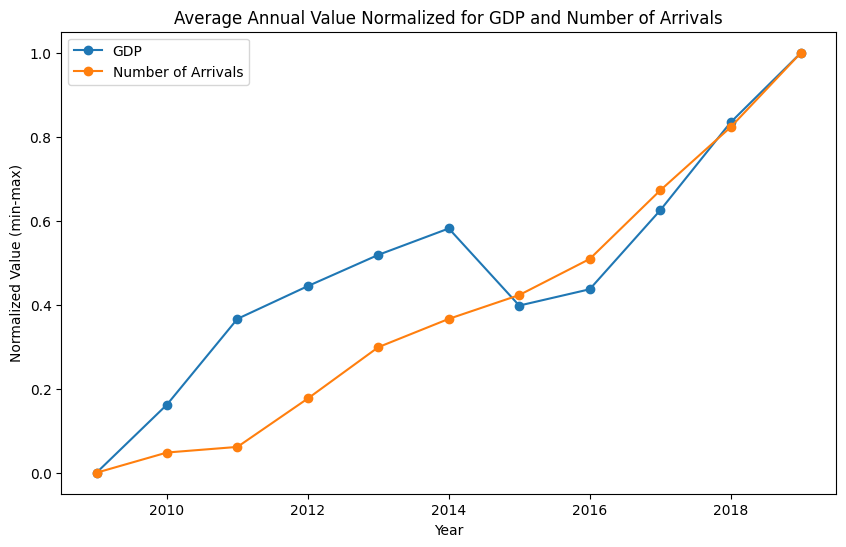

In [ ]:
df = all_data

average_gdp = df.groupby('Year')['GDP (current US$)'].mean()
average_arrivals = df.groupby('Year')['Number of Arrivals'].mean()

# normalizing GDP values
gdp_min = average_gdp.min()
gdp_max = average_gdp.max()
normalized_gdp = (average_gdp - gdp_min) / (gdp_max - gdp_min)

# normalizing arrivals values
arrivals_min = average_arrivals.min()
arrivals_max = average_arrivals.max()
normalized_arrivals = (average_arrivals - arrivals_min) / (arrivals_max - arrivals_min)

plt.figure(figsize=(10, 6))
plt.plot(average_gdp.index, normalized_gdp, label='GDP', linestyle='-', marker='o')
plt.plot(average_arrivals.index, normalized_arrivals, label='Number of Arrivals', linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Normalized Value (min-max)')
plt.title('Average Annual Value Normalized for GDP and Number of Arrivals')
plt.legend()

plt.show()

Now let's take as sample four states: **United States**, **China**, **Italy** and **Maldives**.

We are going to plot the same graph for these four states separately.

In [ ]:
# to facilitate the process I create a function that takes the name of the country as input and makes me the graph
def plot_normalized_data(country_name):
    df = all_data
    country_data = df[df['Country Name'] == country_name]

    average_gdp = country_data.groupby('Year')['GDP (current US$)'].mean()
    average_arrivals = country_data.groupby('Year')['Number of Arrivals'].mean()

    gdp_min = average_gdp.min()
    gdp_max = average_gdp.max()
    normalized_gdp = (average_gdp - gdp_min) / (gdp_max - gdp_min)

    arrivals_min = average_arrivals.min()
    arrivals_max = average_arrivals.max()
    normalized_arrivals = (average_arrivals - arrivals_min) / (arrivals_max - arrivals_min)

    plt.figure(figsize=(10, 6))
    plt.plot(average_gdp.index, normalized_gdp, label='GDP ({})'.format(country_name), linestyle='-', marker='o')
    plt.plot(average_arrivals.index, normalized_arrivals, label='Number of Arrivals ({})'.format(country_name), linestyle='-', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Normalized Value (min-max)')
    plt.title('Annual Value Normalized for GDP and Number of Arrivals ({})'.format(country_name))
    plt.legend()

    plt.show()

**United States**

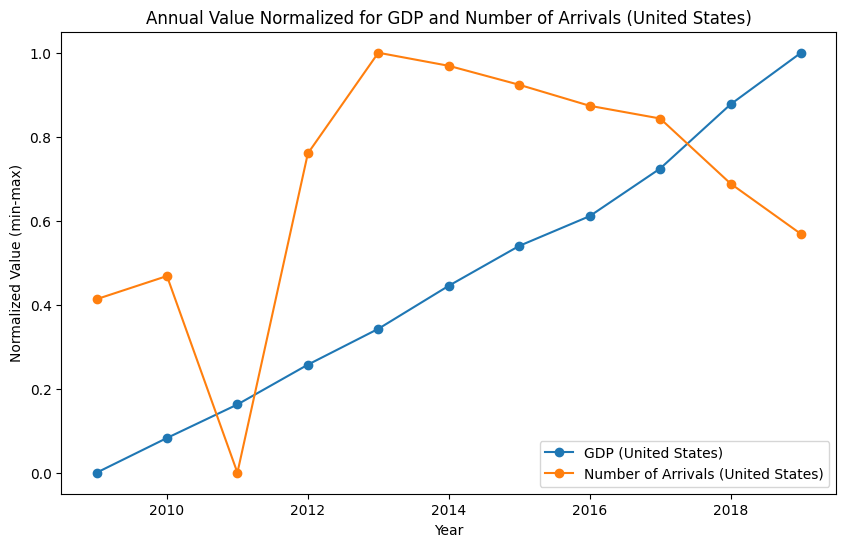

In [ ]:
plot_normalized_data('United States')

**China**

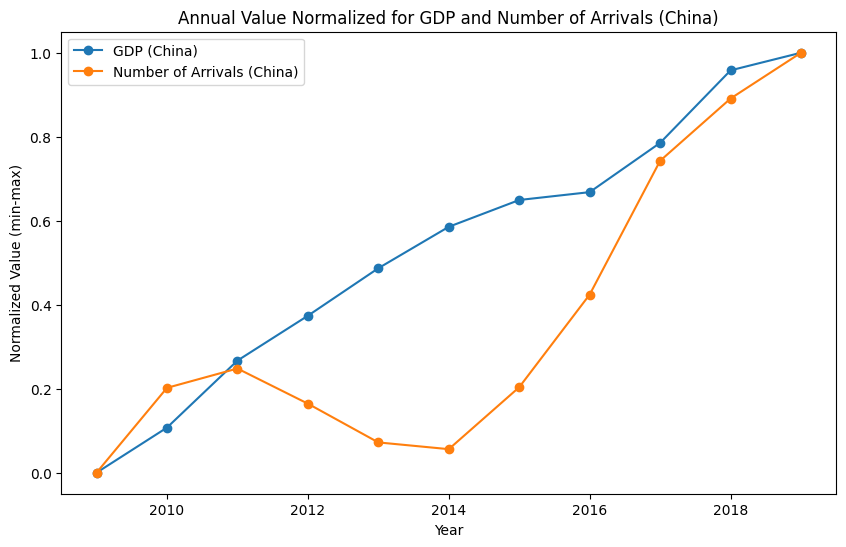

In [ ]:
plot_normalized_data('China')

**Italy**

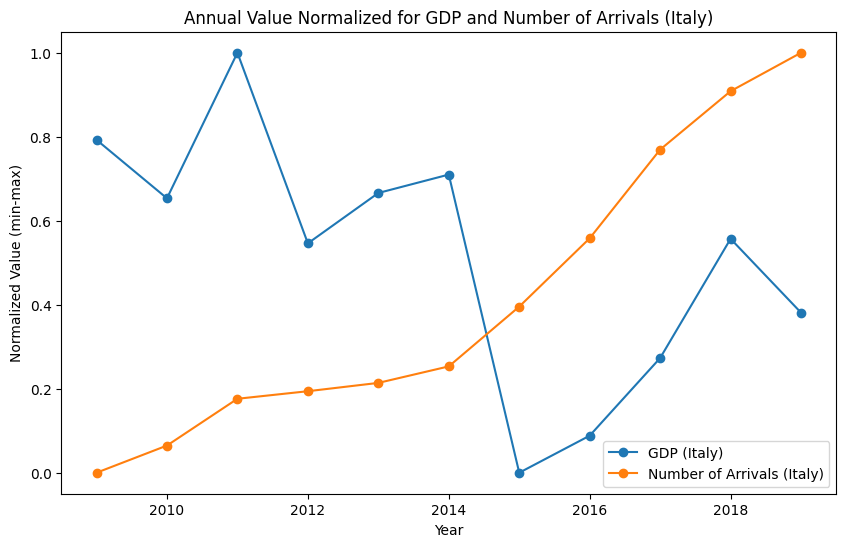

In [ ]:
plot_normalized_data('Italy')

**Maldives**

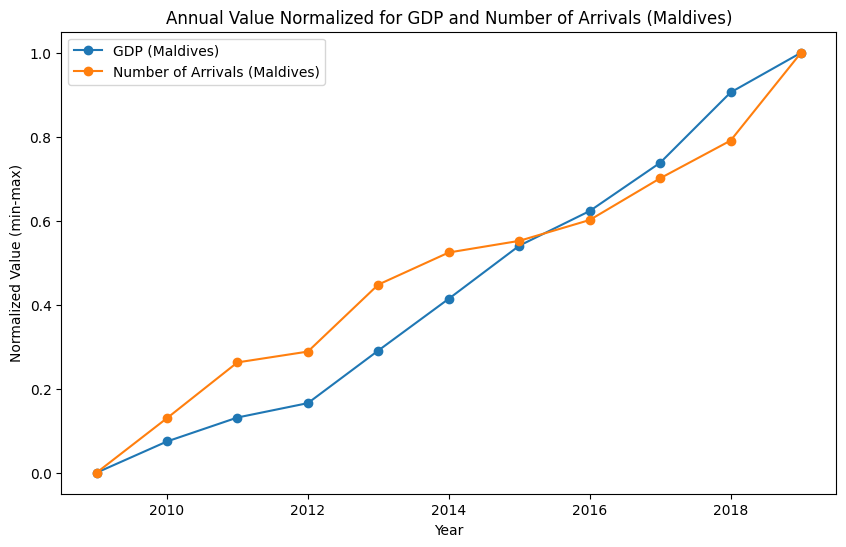

In [ ]:
plot_normalized_data('Maldives')

From those graph above we can draw some conclusions. We can see that in general there is a correlation between number of arrivals and GDP however, as we have already seen before, there is no fixed and precise ratio of proportion. This dependence between the two data also varies from country to country. Let's see how there is a closer correlation in countries like China or countries that depend a lot on tourism like the Maldives, while for the United States and Italy there isn't much correlation between the two data.

### Relationship Between Number of Arrivals annual growth % and GDP annual growth %

Now I want to analize if there is any relationship between the growth rates of the arrivals and the GDP. As we did before first first we are going to use the mean value of the data, so we can see the general trend and later we will analyze some states specifically.

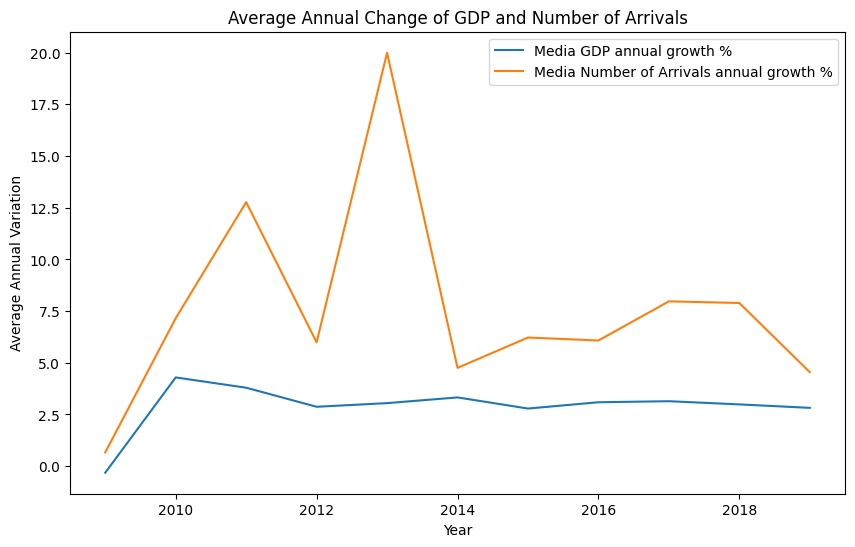

In [ ]:
df = all_data

average_gdp_growth = df.groupby('Year')['GDP annual growth %'].mean()

average_arrivals_growth = df.groupby('Year')['Number of Arrivals annual growth %'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_gdp_growth.index, average_gdp_growth, label='Media GDP annual growth %')
plt.plot(average_arrivals_growth.index, average_arrivals_growth, label='Media Number of Arrivals annual growth %')
plt.xlabel('Year')
plt.ylabel('Average Annual Variation')
plt.title('Average Annual Change of GDP and Number of Arrivals')
plt.legend()

plt.show()

As we did before we take as sample four states: **United States**, **China**, **Italy** and **Maldives**.

We are going to plot the same graph for these four states separately.

In [ ]:
def plot_growth_data(country_name):
    df = all_data

    us_data = df[df['Country Name'] == country_name]

    gdp_growth_us = us_data['GDP annual growth %']
    arrivals_growth_us = us_data['Number of Arrivals annual growth %']

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(us_data['Year'], gdp_growth_us, label='GDP annual growth % ({})'.format(country_name), linestyle='-', marker='o', color='blue')
    ax1.set_ylabel('Variazione annuale del GDP', color='blue')
    ax1.tick_params('y', colors='blue')

    ax2 = ax1.twinx()
    ax2.plot(us_data['Year'], arrivals_growth_us, label='Number of Arrivals annual growth % ({})'.format(country_name), linestyle='-', marker='o', color='green')
    ax2.set_ylabel('Variazione annuale del Number of Arrivals', color='green')
    ax2.tick_params('y', colors='green')

    plt.xlabel('Year')
    plt.title('Annual Variation of GDP annual growth % and Number of Arrivals annual growth %({})'.format(country_name))

    lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
    plt.legend(lines, [line.get_label() for line in lines])

    plt.show()


**United States**

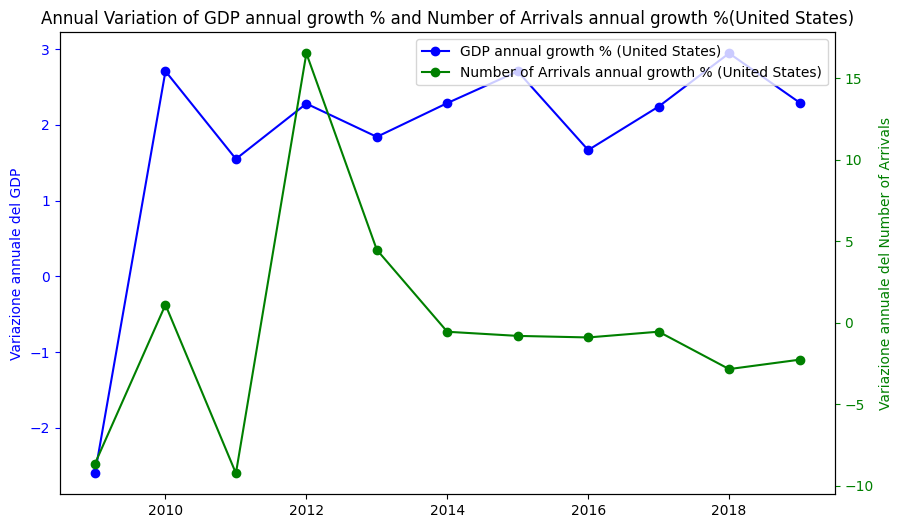

In [ ]:
plot_growth_data('United States')

**China**

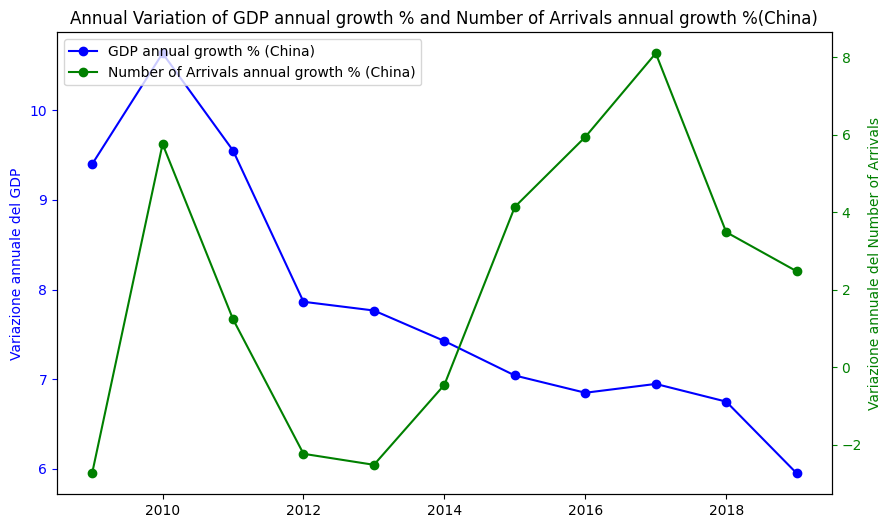

In [ ]:
plot_growth_data('China')

**Italy**

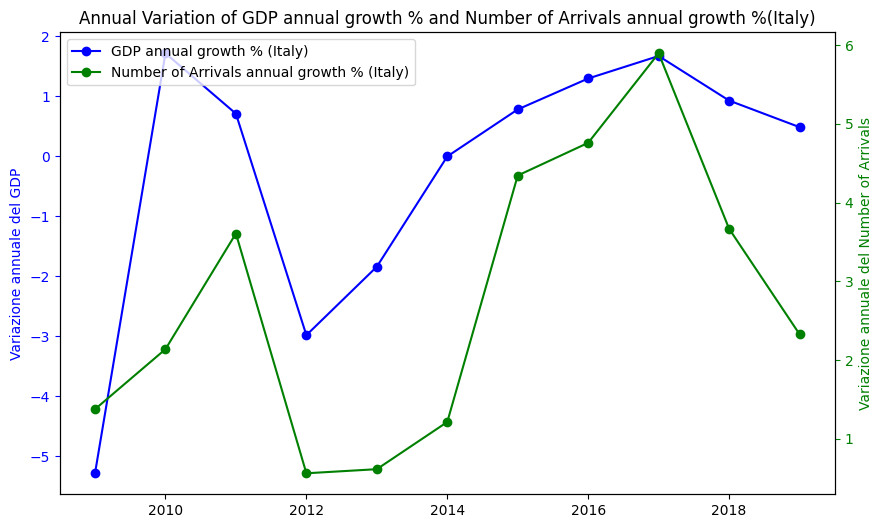

In [ ]:
plot_growth_data('Italy')

**Maldives**

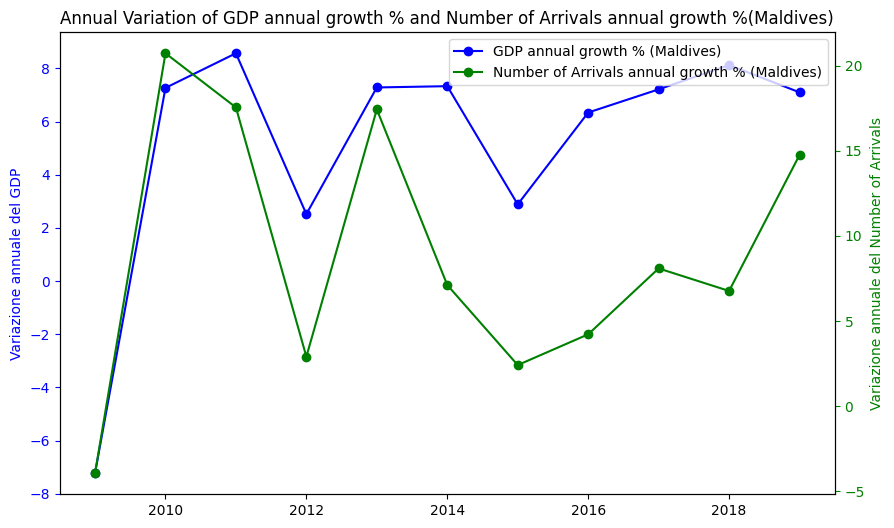

In [ ]:
plot_growth_data('Maldives')

From the graphs above we can see that there is a relationship between these two data, in fact they both grow and decrease together (though not by the same size). We cannot determine a precise and stable relationship of dependence between the two values ​​but we can say with certainty that they are related.

### Relationship Between GDP and Number of Departures
Now we try tu understand if a high GDP level leads to a high number of departures.

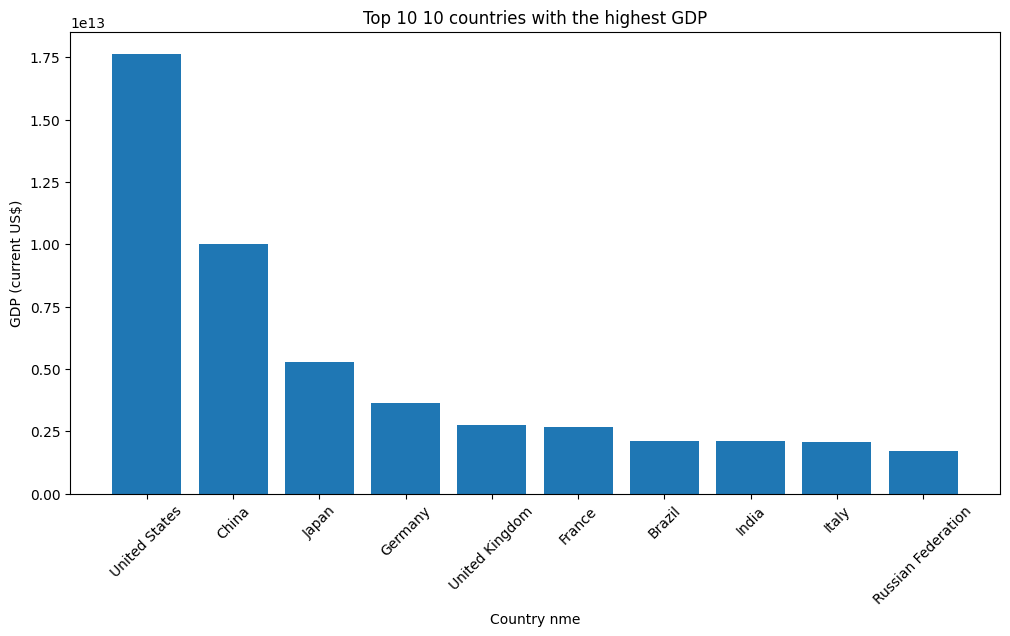

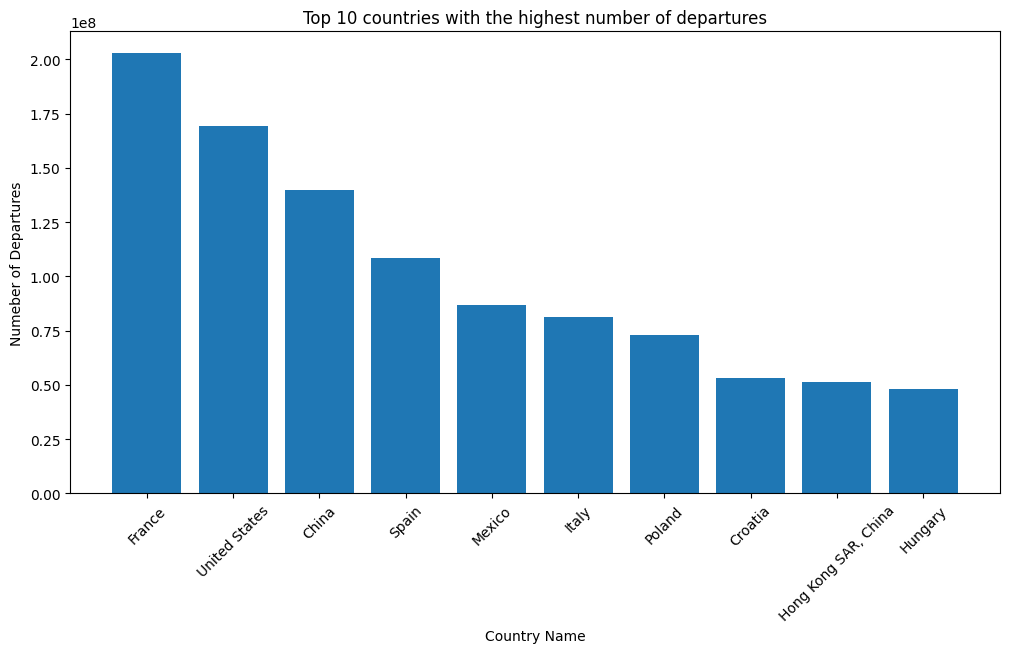

In [ ]:
df = all_data

mean_gdp = df.groupby('Country Name')['GDP (current US$)'].mean()
mean_arrivals = df.groupby('Country Name')['Number of Arrivals'].mean()

top_10_gdp_states = mean_gdp.nlargest(10)

top_10_departures_states = mean_arrivals.nlargest(10)

# barplot of the 10 countries with the highest GDP
plt.figure(figsize=(12, 6))
plt.bar(top_10_gdp_states.index, top_10_gdp_states.values)
plt.xticks(rotation=45)
plt.xlabel('Country nme')
plt.ylabel('GDP (current US$)')
plt.title('Top 10 10 countries with the highest GDP')

plt.show()

# barplot of the 10 countries with the highest number of departures
plt.figure(figsize=(12, 6))
plt.bar(top_10_departures_states.index, top_10_departures_states.values)
plt.xticks(rotation=45)
plt.xlabel('Country Name')
plt.ylabel('Numeber of Departures')
plt.title('Top 10 countries with the highest number of departures')

plt.show()

From these plots we can see that tehre are multiple common elements so there will be some sort of relationship.

## Conclusions
After all the analysis now we can finally answer the reserach questions:

**Number One**
<br>Yes, we can find a relationship between number of international turist and GDP: in general there is a correlation between number of arrivals and GDP however there is no fixed and precise ratio of proportion. This dependence between the two data also varies from country to country. (countries that depend a lot on tourism will have a stronger relationship). We also verified that there is no esplicit relationship between GDP per capita and number of arrivals.

**Number Two**
<br>We can see that there is a strong relationship between number of arrivals annual growth % and GDP annual growth %. In fact they both grow and decrease together, however we can't determine a fixed and precise ratio of proportion.

**Number Three**
<br>Yes, there are some significant differences in the number of arriving/departing tourists between high GDP and low GDP countries. From the analysis above we can say that generally the countries with the highest GDP are those who have the highest number of arrivals and departure. So we can say that a high number of departures leads to a high GDP level that leads to a high number of departures (because people are generally more "rich" so the spend and they travel more).